## chapter08. 차원축소
- 차원을 축소하면 일부 정보가 유실된다
- 어떤 경우는 훈련 데이터의 차원을 축소하면 잡음이나 불필요한 세부사항을 걸러냄으로써 성능을 높일 수가 있다.
- 차원축소는 모델의 **훈련속도**를 높이고 **데이터 시각화**에 중요한 역할을 한다. 

### 8.1. 차원의 저주
- 훈련셋의 차원이 클수록 과대적합의 위험이 커진다
- 차원의 저주를 해결하는 해결책 중 하나는 훈련샘플의 밀도가 충분히 높아질 때까지 훈련셋의 크기를 키우는 것이나 불가능.


### 8.2. 차원축소를 위한 접근 방법
#### 8.2.1.투영
- 결과적으로는 모든 훈련 샘플이 고차원 공간 안의 저차원 부분공간에 놓여 있다. 
- 훈련샘플을 이 부분에 수직으로 투영한다
- 각 축은 새로운 특성 z1, z2에 대응된다. 

#### 8.2.2. 매니폴드
- 2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D이다. 
- 3D에서는 결정경계가 매우 복잡하지만 펼쳐진 매니폴드 공간인 2D에서는 결정 경계가 단순한 직선이다. 

### 8.3. PCA
- 데이터에서 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영한다. <br>
**8.3.1.분산보존**<br>
- 올바른 초평면의 선택이 필요하다. 
- 축을 기준으로 투영했을 때, 최대의 분산을 유지해야 한다(=가장 작은 에러값을 가져야 한다) <br>
**8.3.2.주성분**<br>
- i번째 축을 정의하는 단위벡터를 i번째 주성분이라고 부른다. 
- 특잇값 분해에서 나오는 V값에 주성분이 담겨있다고 본다. 

In [2]:
#3d 데이터셋 마련
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
#svd()함수를 사용하여 훈련셋의 모든 주성분을 구한후 처음 PC를 추출
X_centered = X-X.mean(axis=0)
U,s,Vt=np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]

In [4]:
print(c1,c2) #단위벡터 확인

[0.93636116 0.29854881 0.18465208] [-0.34027485  0.90119108  0.2684542 ]


### 8.3.3.d차원으로 투영하기 
- 주성분을 모두 추출했다면 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소할 수 있다. 

In [5]:
#첫 두개의 주성분으로 정의된 평면에 훈련셋을 투영한다
W2=Vt.T[:,:2]
X2D=X_centered.dot(W2)

In [6]:
X2D #PCA생성 완료

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

#### 8.3.4. sklearn 사용하기
- sklearn의 PCA모델은 앞에서 코드로 구현한 특잇값 분해의 과정을 함축한다 
- sklearn의 모델은 자동으로 데이터를 중앙에 맞춘다. 

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)

In [9]:
#첫번째 주성분(행벡터로 확인가능하므로)
pca.components_.T[:,0]

array([-0.93636116, -0.29854881, -0.18465208])

#### 8.3.5. 설명된 분산의 비율
- 각 주성분의 축을 따라 있는 데이터셋의 분산비율을 나타낸다. 

In [10]:
pca.explained_variance_ratio_
# 84.2%가 첫번째 축에 놓여있고, 14.6%가 두번째 축에 놓여있다 

array([0.84248607, 0.14631839])

#### 8.3.6. 적절한 차원의 수 선택하기
- 축소할 차원의 수를 임의로 정한다기 보단 충분한 분산이 될 때까지 더해야할 차원의 수를 선택한다. 
- 시각화의 경우는 대부분 2개로 줄인다. 
- 설명된 분산을 차원수에 대한 함수로 그려 설명비율에 대한 변곡점을 선택한다. 

In [13]:
#데이터 마련
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [14]:
#훈련, 평가 데이터 샹성
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
#차원을 축소하지 않고 PCA계산 후에 
#유지하려는 주성분의 수 
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum >= 0.95)+1

In [17]:
#설명하려는 비율의 지정
pca=PCA(n_components=0.95) #95%설명비율 저장
X_reduced=pca.fit_transform(X_train)

In [18]:
#설명된 분산을 차원수에 대한 함수로 그리는 방법
#코드 확인해보기

#### 8.3.7.압축을 위한 PCA
- 원본데이터에 대해 분산은 유지되지만 데이터셋은 원본 크기의 20%가 된다
- 여기서 PCA변환을 반대로 적용하여 **재구성오차**를 구하고 원래 형태로 되돌릴 수도 있다. 

In [19]:
#Mnist데이터 확인
pca=PCA(n_components=154) #차원의 수를 지정
X_reduced=pca.fit_transform(X_train)
X_recovered=pca.inverse_transform(X_reduced)#복원

#### 8.3.8. 점진적 PCA
- PCA의 가장 큰 문제점은 SVD를 적용하기 위해서는 모든 데이터를 한번에 훈련시켜야 한다는 점이다. (메모리 문제)
- 이에 따라 미니배치로 나눈 뒤 IPCA에 점진적으로 적용하는 방법을 사용한다. 

In [21]:
#미니배치로 줄이고 IPCA적용
from sklearn.decomposition import IncrementalPCA
n_batches= 100 #하나의 훈련셋 크기
inc_pca=IncrementalPCA(n_components=154) #줄이고자 하는 차원

#훈련하고자 하는 미니배치 데이터를 적용한다. 
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch) #훈련 
    
X_reduced= inc_pca.transform(X_train) #데이터 변환

....................................................................................................

```python
#numpy의 memmap을 사용하여 이진파일에 저장된 큰 배열을 메모리에 있는 것처럼 다룬다, 
#데이터를 적재하여 사용한다. 
filename = "my_mnist.data"
m, n = X_train.shape

X_mm=np.memmap(filename, dtype='float32', mode='readonly',shape=(m,n) )
batch_size=m//n_batches
inc_pca=IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
```

#### 8.3.9.랜덤 PCA
- 각 차원에 대해 주성분의 확률값을 randomize하게 사용하여 계산속도를 높이는 방법

In [25]:
rnd_pca=PCA(n_components=152, svd_solver='randomized')
X_reduced=rnd_pca.fit_transform(X_train)

#### 8.3.10. 커널 PCA
- 샘플을 매우 높은 고차원의 공간으로 암묵적으로 매핑하여 SVM의 비선형 분류와 회귀를 가능하게 하는 수학적 기법인 **커널트릭**을 앞에서 배운바가 있다. 
- 고차원 특성공간에서의 선형결정경계는 원본 공간에서는 복잡한 비선형의 결정경계이다. 
- 커널함수 : 비선형 SVM의 경우에 결정경계를 선형으로 만들기 힘들다. 이에 대해 고차원의 유클리드 공간에 데이터를 매핑함으로써 선형 결정경계를 만들게 해주는 함수이다. 
- 위와 같은 방법을 PCA에 적용해 차원축소를 위한 복잡한 비선형 투영을 수행할 수가 있다. 이를 kPCA라고 한다. 
- 이 기법은 투영된 후의 샘플을 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유리하다. 

In [28]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [29]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

아래의 그림은 선형커널, RBF커널, 시그모이드 커널을 사용하여 2차원으로 축소한 스위스롤의 모습이다.

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

<Figure size 1100x400 with 3 Axes>

#### 8.4.1. 커널 선택과 하이퍼파라미터 튜닝
- 차원축소는 지도학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수가 있다. 
- 먼저 kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다
- 하이퍼파라미터 튜닝을 위해 GridSearchCV를 하용해 가장 좋은 커널과 gamma파라미터를 찾는다. 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#모델적용 파이프라인 
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

#파라미터 조정값
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

#최적의 파라미터 조정
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [37]:
#가장 좋은 커널과 하이퍼파라미터는 best_params_에 저장한다
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


또 다른 방법은 완전한 비지도 학습 방법으로 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식이다. 

커널트릭 덕분에 훈련셋으 특성맵을 사용한 무한차원의 특성공간으로 매핑한 다음 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 동일하다. 

**재구성원상**은 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다. 

In [38]:
#투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도학습 회귀 모델을 적용
rbf_pca=KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced=rbf_pca.fit_transform(X)
X_preimage=rbf_pca.inverse_transform(X_reduced)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage) #재구성 원상 오차

32.78630879576614

### 8.5. LLE
- 지역선형임베딩은 또다른 강력한 비선형 차원축소기술이다. 
- **매니폴드**학습방법에 속한다. 
- 서로 인접한 데이터들을 보존하면서 고차원인 데이터셋을 저차원으로 축소하는 방법이다. 
- http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf
- 각 훈련샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관이 되어 있는지를 측정한다. 
- 국부적인 관계가 가장 잘 보존되는 저차원의 표현을 찾는다. 

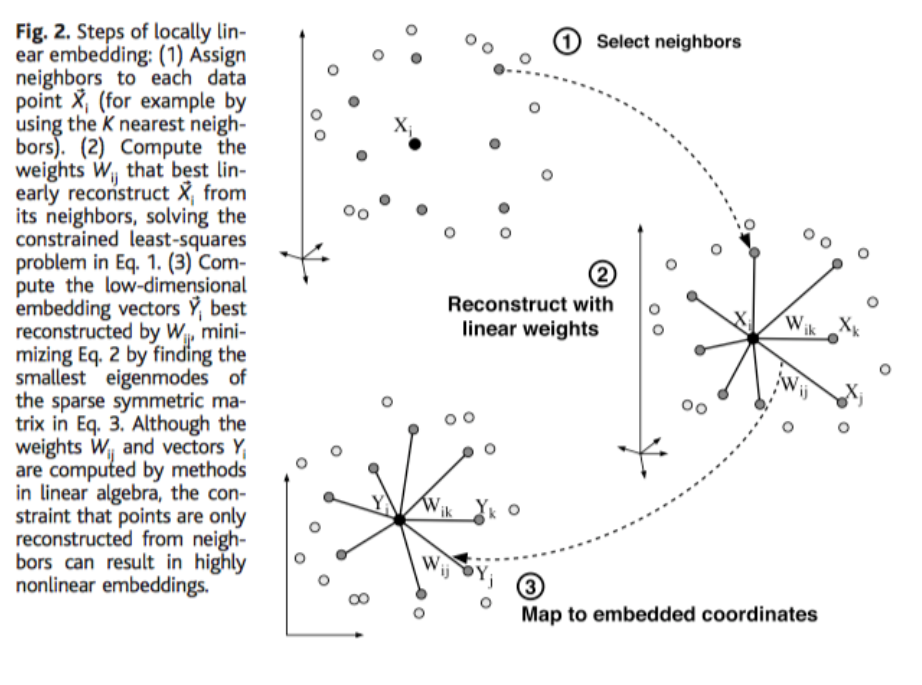

In [40]:
from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced=lle.fit_transform(X)